In [28]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import math
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
import time

In [2]:
y=pd.read_csv('allstate_labels_2007.csv',low_memory=False)
y=y['loan_status']
X=pd.read_csv('allstate_filtered_loans_2007.csv',low_memory=False)


In [3]:
X,y=shuffle(X,y,random_state=0)
X_train_origin,X_test,y_train_origin,y_test=train_test_split(X,y,random_state=5,test_size=0.2)
X_train=X_train_origin
y_train=y_train_origin

In [23]:
smt = SMOTETomek(1)
X_train,y_train = smt.fit_resample(X_train_origin, y_train_origin)

In [29]:
train_size=list(range(1,11))
train_size[:]=[x/10 for x in train_size]
errorate_train=[]
errorate_test=[]
FP_train=[]
FP_test=[]
train_time=[]
for n in train_size:
    X_train,y_train=shuffle(X_train,y_train,random_state=0)
    X_train_sub=X_train[:int(len(X_train)*n)]
    y_train_sub=y_train[:int(len(y_train)*n)]
    time_start=time.clock()
    clf_gini=DecisionTreeClassifier(criterion = "gini",max_depth=30)
    clf_gini.fit(X_train_sub,y_train_sub)
    errorate_train.append(1-accuracy_score(y_train_sub,clf_gini.predict(X_train_sub)))
    errorate_test.append(1-accuracy_score(y_test,clf_gini.predict(X_test)))
    error_train=clf_gini.predict(X_train_sub)-y_train_sub
    FP_train.append(Counter(error_train)[1]/Counter(y_train_sub)[0])
    error_test=clf_gini.predict(X_test)-y_test
    FP_test.append(Counter(error_test)[1]/Counter(y_test)[0])
    train_time.append(time.clock()-time_start)


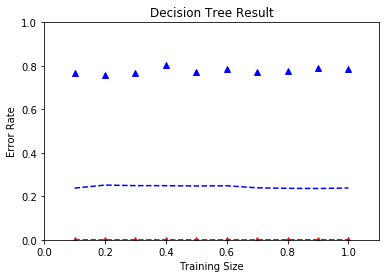

In [38]:
plt.plot(train_size,errorate_train,'r--',train_size,errorate_test,'b--',train_size,FP_train, 'r^', train_size,FP_test, 'b^')
plt.axis([0,1.1,0,1])
plt.ylabel('Error Rate')
plt.xlabel('Training Size')
plt.title('Decision Tree Result')
plt.savefig('E:/Machine Learning/HW1/Bank/Bank_DT_Error.png')

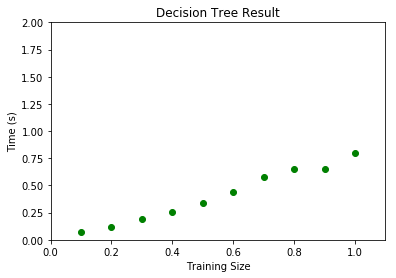

In [31]:
plt.plot(train_size,train_time,'go')
plt.axis([0,1.1,0,2])
plt.ylabel('Time (s)')
plt.xlabel('Training Size')
plt.title('Decision Tree Result')
plt.savefig('E:/Machine Learning/HW1/Bank/Bank_DT_T.png')

In [14]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
param_dist={ 
            'criterion':['gini','entropy'],
            'min_samples_leaf':[0.005,0.01,0.015,0.02,0.025]  
}
DecisionTree=DecisionTreeClassifier()
DT_cv=RandomizedSearchCV(DecisionTree,param_dist,cv=5)

In [22]:
DT_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'criterion': ['gini', 'entropy'], 'min_samples_leaf': [0.005, 0.01, 0.015, 0.02, 0.025]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [23]:
DT_cv.best_params_

{'min_samples_leaf': 0.005, 'criterion': 'entropy'}

In [24]:
1-DT_cv.best_score_

0.13379715273867931

In [4]:
from imblearn.under_sampling import RandomUnderSampler
res=RandomUnderSampler()

In [5]:
X_res,y_res=res.fit_resample(X_train_origin, y_train_origin)

In [21]:
    clf_gini=DecisionTreeClassifier(criterion = "gini",max_depth=6)
    clf_gini.fit(X_res,y_res)
    errorate_train_res=1-accuracy_score(y_res,clf_gini.predict(X_res))
    errorate_test_res=1-accuracy_score(y_test,clf_gini.predict(X_test))
    error_train=clf_gini.predict(X_res)-y_res
    FP_train_res=Counter(error_train)[1]/Counter(y_res)[0]
    error_test=clf_gini.predict(X_test)-y_test
    FP_test_res=Counter(error_test)[1]/Counter(y_test)[0]

In [22]:
print(errorate_test_res,FP_test_res,errorate_train_res,FP_train_res)

0.40401034928848645 0.33026678932842685 0.34905442804428044 0.31411439114391143


In [26]:
print(errorate_test[-1],FP_test[-1],errorate_train[-1],FP_train[-1])

0.23260025873221213 0.7589696412143514 0.00018086089787383575 0.00024114786383183957
